<a href="https://colab.research.google.com/github/punitarani/MAT-494/blob/master/3.2%20Continuity%20and%20Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 3.2 Continuity and Differentiation
____________________________________
### Key Concepts:
* Limits and Continuity

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import diff, limit, ln, sin, symbols

## Limits and Continuity

### Euclidean Norm

$ ||x|| = \sqrt{\Sigma_{i=1}^d x_i^2} $

In [2]:
def norm(X):
    """Euclidean Norm"""
    return np.sqrt(np.sum(X**2))

In [3]:
# Create list of X values
_Xs = [
    1,
    np.array([1]),
    np.array([1, 2]),
    np.array([1, 2, 3, 4]),
    np.array([[1], [2], [3], [4]]),
    np.array([[1, 2], [3, 4]])
]

In [4]:
# Find the norm for each X
for _X in _Xs:
    print(_X)
    print("Norm: ", norm(_X))
    print()

1
Norm:  1.0

[1]
Norm:  1.0

[1 2]
Norm:  2.23606797749979

[1 2 3 4]
Norm:  5.477225575051661

[[1]
 [2]
 [3]
 [4]]
Norm:  5.477225575051661

[[1 2]
 [3 4]]
Norm:  5.477225575051661



### Limits

$\underset{x \to a}{lim} f(x) = L$

In [5]:
# Create symbolic value of x
x = symbols('x')

In [6]:
# Create a list of symbolic functions
_fxs = [
    x,
    x**2,
    x**3,
    1/x,
    sin(x),
    ln(x),
    x*sin(x)/ln(x)
]

### Symbolic Limits

In [7]:
# Find the limit for each function
for _fx in _fxs:
    print("f(x) = ", _fx)
    print("-"*(len(_fx.__str__())+8))

    print("Limits:")
    print("\t -oo: ",  limit(_fx, x, "-oo"))
    print("\t -2:  ",  limit(_fx, x, -1))
    print("\t 0:   ",  limit(_fx, x, 0))
    print("\t 3:   ",  limit(_fx, x, 1))
    print("\t oo:  ",  limit(_fx, x, "oo"))
    print()

f(x) =  x
---------
Limits:
	 -oo:  -oo
	 -2:   -1
	 0:    0
	 3:    1
	 oo:   oo

f(x) =  x**2
------------
Limits:
	 -oo:  oo
	 -2:   1
	 0:    0
	 3:    1
	 oo:   oo

f(x) =  x**3
------------
Limits:
	 -oo:  -oo
	 -2:   -1
	 0:    0
	 3:    1
	 oo:   oo

f(x) =  1/x
-----------
Limits:
	 -oo:  0
	 -2:   -1
	 0:    oo
	 3:    1
	 oo:   0

f(x) =  sin(x)
--------------
Limits:
	 -oo:  AccumBounds(-1, 1)
	 -2:   -sin(1)
	 0:    0
	 3:    sin(1)
	 oo:   AccumBounds(-1, 1)

f(x) =  log(x)
--------------
Limits:
	 -oo:  oo
	 -2:   I*pi
	 0:    -oo
	 3:    0
	 oo:   oo

f(x) =  x*sin(x)/log(x)
-----------------------
Limits:
	 -oo:  AccumBounds(-oo, oo)
	 -2:   -I*sin(1)/pi
	 0:    0
	 3:    oo
	 oo:   AccumBounds(-oo, oo)



## Derivatives

Derivative of a function is the rate of change of the function with respect to the independent variable.

$f'(x) = \frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$

### Symbolic Derivatives

In [8]:
# Find the limit for each function
for _fx in _fxs:
    print("f(x) = ", _fx)

    _fprime = _fx.diff(x)
    print("f'(x) = ", _fprime)
    print("-"*(len(_fprime.__str__())+9) + "\n")

f(x) =  x
f'(x) =  1
----------

f(x) =  x**2
f'(x) =  2*x
------------

f(x) =  x**3
f'(x) =  3*x**2
---------------

f(x) =  1/x
f'(x) =  -1/x**2
----------------

f(x) =  sin(x)
f'(x) =  cos(x)
---------------

f(x) =  log(x)
f'(x) =  1/x
------------

f(x) =  x*sin(x)/log(x)
f'(x) =  x*cos(x)/log(x) + sin(x)/log(x) - sin(x)/log(x)**2
-----------------------------------------------------------



### Numerical Derivatives

In [9]:
def differentiate(X, Y):
    """Find the First Derivative dY/dX"""

    dY = np.zeros(len(X))

    for i in range(len(X)):
        if i == 0:
            dY[i] = (Y[i+1] - Y[i]) / (X[i+1] - X[i])
        elif i == len(X)-1:
            dY[i] = (Y[i] - Y[i-1]) / (X[i] - X[i-1])
        else:
            dY[i] = (Y[i+1] - Y[i-1]) / (X[i+1] - X[i-1])

    return dY

In [10]:
# Create a numerical function f(x) = x^3 - 22x^2 - 4x from 0 to 25 with a step size of 0.001
_x_vals = np.arange(0, 25, 0.001)
_f_x_vals = _x_vals ** 3 - 22 * _x_vals ** 2 - 4 * _x_vals

# Differentiate
_f_prime_vals = differentiate(_x_vals, _f_x_vals)

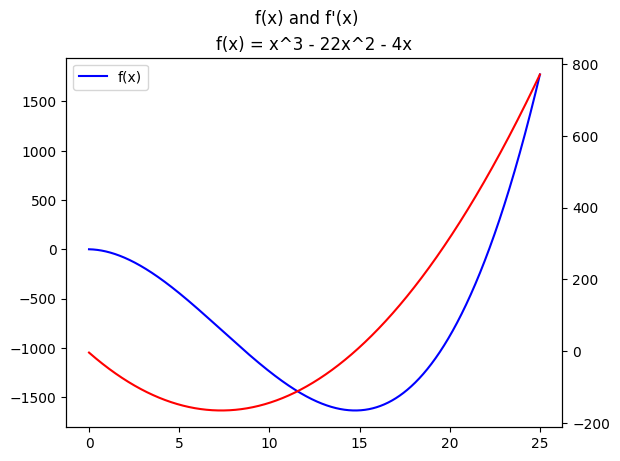

In [11]:
_f_x_fig, _f_x_ax = plt.subplots()
plt.suptitle("f(x) and f'(x)")
plt.title("f(x) = x^3 - 22x^2 - 4x")

_f_x_ax.plot(_x_vals, _f_x_vals, "b", label="f(x)")

_f_prime_ax = _f_x_ax.twinx()
_f_prime_ax.plot(_x_vals, _f_prime_vals, "r", label="f'(x)")

_f_x_ax.legend()

plt.show()